In [1]:
import pandas as pd
import random

In [2]:
sample_frac = 0.01


In [5]:
%%time
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv("train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'], 
                 skiprows=skip_row)

CPU times: total: 59.7 s
Wall time: 1min 1s


In [6]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


In [10]:
### Load Test Set

test_df = pd.read_csv('test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [11]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [13]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910492,-72.504341,39.934257,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255058,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [14]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [16]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974724,40.751041,-73.973663,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [17]:
test_df.pickup_datetime.min(), test_df.pickup_datetime.max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
len(train_df), len(val_df)

(441960, 110490)

In [21]:
train_df = train_df.dropna()
val_df = val_df.dropna()

In [22]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [23]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [24]:
target_col = 'fare_amount'

In [25]:
train_inputs = train_df[input_cols]

In [26]:
train_targets = train_df[target_col]

In [27]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4.0
360070,-73.993805,40.724579,-73.993805,40.724577,1.0
372609,-73.959160,40.780750,-73.969116,40.761231,1.0
550895,-73.952187,40.783951,-73.978645,40.772603,1.0
444151,-73.977112,40.746834,-73.991104,40.750403,2.0
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763167,1.0
259178,-73.972656,40.764042,-74.013176,40.707841,2.0
365838,-73.991982,40.749767,-73.989845,40.720552,3.0
131932,-73.969055,40.761398,-73.990814,40.751327,1.0


In [28]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 441960, dtype: float32

In [29]:
val_inputs = val_df[input_cols]

In [30]:
val_targets = val_df[target_col]

In [31]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1.0
149839,-73.977386,40.738335,-73.976143,40.751204,1.0
515867,-73.983910,40.749470,-73.787170,40.646643,1.0
90307,-73.790794,40.643463,-73.972252,40.690180,1.0
287032,-73.976593,40.761944,-73.991463,40.750309,2.0
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750020,3.0
19482,-73.986725,40.755920,-73.985855,40.731170,1.0
186063,0.000000,0.000000,0.000000,0.000000,1.0
382260,-73.980057,40.760334,-73.872589,40.774298,1.0


In [32]:
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

In [33]:
test_inputs = test_df[input_cols]

In [34]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [35]:
import numpy as np

In [36]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [37]:
mean_model = MeanRegressor()

In [38]:
mean_model.fit(train_inputs, train_targets)

In [39]:
mean_model.mean

np.float32(11.354714)

In [40]:
train_preds = mean_model.predict(train_inputs)

In [41]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], shape=(441960,), dtype=float32)

In [42]:
val_preds = mean_model.predict(val_inputs)

In [43]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], shape=(110490,), dtype=float32)

In [44]:
from sklearn.metrics import mean_squared_error

In [51]:
from math import sqrt
train_rmse = sqrt(mean_squared_error(train_targets, train_preds))

In [52]:
train_rmse

9.789782620160674

In [54]:
from math import sqrt
val_rmse = sqrt(mean_squared_error(val_targets, val_preds))

In [55]:
val_rmse

9.89995425435296

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
linreg_model = LinearRegression()

In [58]:
linreg_model.fit(train_inputs, train_targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([11.54623682, 11.28460949, 11.28413941, ..., 11.45891673,
       11.28428005, 11.28444733], shape=(441960,))

In [60]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([11.28432795, 11.28449549, 11.28478054, ..., 11.80449938,
       11.28443343, 11.28413233], shape=(110490,))

In [62]:
from math import sqrt
train_rmse = sqrt(mean_squared_error(train_targets, train_preds))

In [63]:
train_rmse

9.78863266989743

In [64]:
from math import sqrt
val_rmse = sqrt(mean_squared_error(val_targets, val_preds))
val_rmse

9.898088220645104

In [65]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [66]:
test_preds = linreg_model.predict(test_inputs)

In [67]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [68]:
add_dateparts(train_df, 'pickup_datetime')

In [69]:
add_dateparts(val_df, 'pickup_datetime')

In [70]:
add_dateparts(test_df, 'pickup_datetime')

In [71]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724577,1.0,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761231,1.0,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772603,1.0,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750403,2.0,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763167,1.0,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707841,2.0,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,2011,2,17,3,18


In [72]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [73]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [74]:
%%time
add_trip_distance(train_df)

CPU times: total: 78.1 ms
Wall time: 50.9 ms


In [75]:
add_trip_distance(val_df)

In [76]:
add_trip_distance(test_df)

In [77]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
493744,10.6,2009-02-27 21:24:25+00:00,-73.993721,40.751457,-73.968254,40.786790,2.0,2009,2,27,4,21,4.473469
387345,5.7,2011-08-10 22:51:00+00:00,-73.969849,40.754360,-73.986824,40.753502,2.0,2011,8,10,2,22,1.431952
329879,4.9,2010-10-04 11:28:00+00:00,-74.006844,40.715767,-74.007729,40.724685,1.0,2010,10,4,0,11,0.994042
204498,6.5,2014-02-16 13:40:35+00:00,-73.991066,40.747196,-74.005600,40.740080,1.0,2014,2,16,6,13,1.456866
1523,3.7,2009-05-22 12:07:32+00:00,-74.006187,40.733799,-73.999649,40.733970,1.0,2009,5,22,4,12,0.550728


In [78]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [79]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [80]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: total: 234 ms
Wall time: 233 ms


In [81]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
460106,9.5,2013-09-09 07:23:44+00:00,-73.969154,40.754215,-73.991142,40.739445,1.0,2013,9,9,0,7,2.473937,21.004258,10.702467,16.411558,5.024213,3.375777
366075,45.0,2011-09-12 07:20:20+00:00,-73.983360,40.726017,-73.776344,40.646078,1.0,2011,9,12,0,7,19.575896,0.551200,16.703590,33.905307,21.615499,21.025235
6949,6.0,2013-03-04 20:00:36+00:00,-73.973923,40.747047,-73.982849,40.744432,1.0,2013,3,4,0,20,0.805805,20.711270,9.846515,17.258033,4.222952,4.207537
220493,19.5,2014-11-28 17:42:53+00:00,-73.995697,40.728321,-73.976669,40.759709,1.0,2014,11,28,4,17,3.838189,21.283521,8.849051,18.397380,2.464085,5.936061
22036,9.3,2011-06-08 21:48:00+00:00,-73.985474,40.740482,-73.987038,40.768262,1.0,2011,6,8,2,21,3.089690,22.557750,9.560686,18.050817,2.356635,6.478176


In [82]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498634,39.910000,-72.508148,39.937865,1.684444,2011.740038,6.263920,15.732492,3.035813,13.506568,19.751764,193.147978,182.365206,191.412330,177.416092,178.902096
std,9.789793,11.795325,8.464263,12.398610,9.857420,1.344170,1.857024,3.434881,8.697374,1.950033,6.517710,371.299305,1223.614787,1226.672207,1228.515208,1228.388658,1228.487258
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.305535,0.116385,0.129259,0.031095,0.009334
25%,6.000000,-73.992027,40.734859,-73.991409,40.733968,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212450,20.535191,8.350965,16.502844,2.169888,3.642498
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116230,21.202076,9.575570,18.016353,3.818017,5.559662
75%,12.500000,-73.967186,40.767006,-73.963715,40.768045,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.879673,21.948262,11.122069,19.953306,6.071750,7.814534
max,400.000000,2420.209473,404.899994,2467.752686,3351.403027,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16913.444834,15057.674834,15074.642961,15074.714623,15077.613474,15072.109731


In [83]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974724,40.751041,-73.973663,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433217,20.916707,9.675209,18.546655,4.512975,6.037621
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303942,3.295656,4.035818,4.018438,4.252537
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000009,0.402057,0.285510,0.284706,0.085728,0.040386
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297281,20.513366,8.311562,16.520468,2.126326,3.669914
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215669,21.181394,9.477792,18.024364,3.698360,5.541418
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042928,21.909781,10.965471,19.880521,5.922760,7.757408
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933359,134.497657,126.062486,149.400789,130.347048,138.619454


In [84]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [85]:
train_df = remove_outliers(train_df)

In [86]:
val_df = remove_outliers(val_df)

In [87]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [88]:

input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [89]:
target_col = 'fare_amount'

In [90]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [91]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [92]:
test_inputs = test_df[input_cols]

In [99]:
from math import sqrt
def evaluate(model):
    
    train_preds = model.predict(train_inputs)
    
    train_rmse = sqrt(mean_squared_error(train_targets, train_preds))
    val_preds = model.predict(val_inputs)
    val_rmse = sqrt(mean_squared_error(val_targets, val_preds))
    return train_rmse, val_rmse, train_preds, val_preds

In [100]:
def predict_and_submit(model, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [101]:
from sklearn.linear_model import Ridge

In [102]:
model1 = Ridge(random_state=42)

In [103]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: total: 78.1 ms
Wall time: 83.1 ms


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


In [104]:
evaluate(model1)

(5.049312855022607,
 5.217863164084475,
 array([ 8.12926895,  4.11625204,  8.75052428, ..., 10.47189549,
         8.23053339, 10.58672574], shape=(431098,)),
 array([10.91970437,  6.20497332, 46.21797207, ...,  8.04644756,
        25.56873019,  8.45308844], shape=(107742,)))

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [107]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: total: 9min 42s
Wall time: 46.3 s


,n_estimators,50
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [109]:
evaluate(model2)

(3.5979185810359677,
 4.1631842472822465,
 array([ 7.04561969,  9.17150794,  9.10837664, ..., 10.38572951,
         7.74169069, 10.38922928], shape=(431098,)),
 array([12.53333721,  6.14758144, 47.32745299, ...,  8.33103424,
        29.15652571,  8.2638333 ], shape=(107742,)))

In [110]:
from xgboost import XGBRegressor

In [111]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [112]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: total: 15.5 s
Wall time: 3.35 s


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [113]:
evaluate(model3)

(3.114266693112142,
 3.967755651187676,
 array([ 6.2575097,  8.435964 , 10.496409 , ..., 11.761659 ,  9.359157 ,
        10.077442 ], shape=(431098,), dtype=float32),
 array([14.8424   ,  6.0813756, 48.09645  , ...,  7.7121677, 30.280682 ,
         8.897864 ], shape=(107742,), dtype=float32))

In [120]:
import matplotlib.pyplot as plt
from math import sqrt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = sqrt(mean_squared_error(train_targets, train_preds))
    val_rmse = sqrt(mean_squared_error(val_targets, val_preds))

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [124]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

In [125]:
print("train_targets shape:", train_targets.shape)
print("train_preds shape:", train_preds.shape)

train_targets shape: (431098,)
train_preds shape: (441960,)


In [130]:
# Get predictions
train_preds = model3.predict(train_inputs)
val_preds = model3.predict(val_inputs)

# Debug shapes
print("train_targets shape:", train_targets.shape)
print("train_preds shape:", train_preds.shape)
print("val_targets shape:", val_targets.shape)
print("val_preds shape:", val_preds.shape)

# Ensure sizes match
min_train_len = min(len(train_targets), len(train_preds))
min_val_len = min(len(val_targets), len(val_preds))

train_targets = train_targets[:min_train_len]
train_preds = train_preds[:min_train_len]

val_targets = val_targets[:min_val_len]
val_preds = val_preds[:min_val_len]


train_targets shape: (431098,)
train_preds shape: (431098,)
val_targets shape: (107742,)
val_preds shape: (107742,)


In [147]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

def test_params(ModelClass, train_inputs, train_targets, val_inputs, val_targets, **params):
   

    try:
        print(f"Training model with params: {params}")
        model = ModelClass(**params).fit(train_inputs, train_targets)

        # Predictions
        train_preds = model.predict(train_inputs)
        val_preds = model.predict(val_inputs)

        # Check shape consistency
        min_train_len = min(len(train_targets), len(train_preds))
        min_val_len = min(len(val_targets), len(val_preds))

        if len(train_targets) != len(train_preds):
            print(f" Mismatch in train sizes: targets={len(train_targets)}, preds={len(train_preds)}. Aligning.")
            train_targets = train_targets[:min_train_len]
            train_preds = train_preds[:min_train_len]

        if len(val_targets) != len(val_preds):
            print(f" Mismatch in val sizes: targets={len(val_targets)}, preds={len(val_preds)}. Aligning.")
            val_targets = val_targets[:min_val_len]
            val_preds = val_preds[:min_val_len]

        # Calculate RMSE
        train_rmse = sqrt(mean_squared_error(train_targets, train_preds))
        val_rmse = sqrt(mean_squared_error(val_targets, val_preds))

        print(f"✅ train_RMSE: {train_rmse:.4f}, val_RMSE: {val_rmse:.4f}")
        return train_rmse, val_rmse

    except Exception as e:
        print(f"Error in test_params: {e}")
        return None, None


def test_param_and_plot(ModelClass, param_name, param_values, train_inputs, train_targets, val_inputs, val_targets, **other_params):
    
    train_errors = []
    val_errors = []

    for value in param_values:
        print(f"\n Testing {param_name} = {value}")
        params = dict(other_params)
        params[param_name] = value

        train_rmse, val_rmse = test_params(ModelClass, train_inputs, train_targets, val_inputs, val_targets, **params)

        if train_rmse is None or val_rmse is None:
            print(" Skipping this parameter due to error")
            train_errors.append(None)
            val_errors.append(None)
            continue

        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(param_values, train_errors, marker='o', label="Train RMSE")
    plt.plot(param_values, val_errors, marker='s', label="Validation RMSE")
    plt.xlabel(param_name)
    plt.ylabel("RMSE")
    plt.title(f"{param_name} vs RMSE")
    plt.legend()
    plt.grid(True)
    plt.show()



🔄 Testing n_estimators = 100
Training model with params: {'random_state': 42, 'n_jobs': -1, 'objective': 'reg:squarederror', 'n_estimators': 100}
✅ train_RMSE: 3.1143, val_RMSE: 3.9678

🔄 Testing n_estimators = 250
Training model with params: {'random_state': 42, 'n_jobs': -1, 'objective': 'reg:squarederror', 'n_estimators': 250}
✅ train_RMSE: 2.7625, val_RMSE: 3.9806

🔄 Testing n_estimators = 500
Training model with params: {'random_state': 42, 'n_jobs': -1, 'objective': 'reg:squarederror', 'n_estimators': 500}
✅ train_RMSE: 2.4441, val_RMSE: 4.0006


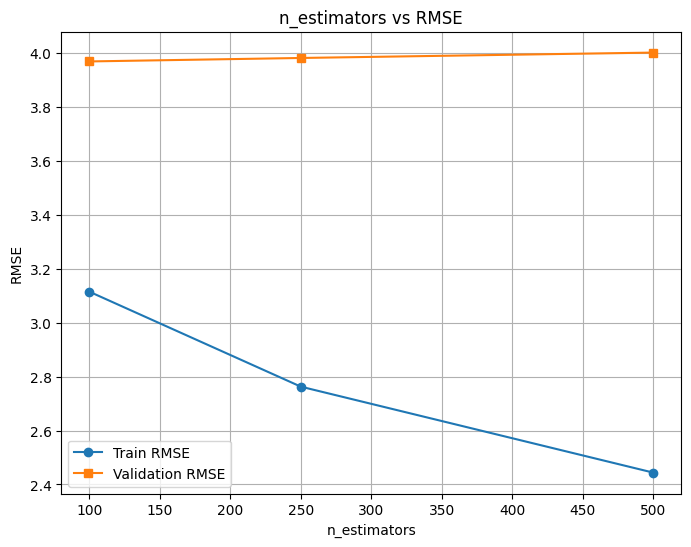

In [145]:
from xgboost import XGBRegressor


test_param_and_plot(
    XGBRegressor,
    'n_estimators',            
    [100, 250, 500],           
    train_inputs,
    train_targets,
    val_inputs,
    val_targets,
    **best_params           
)


In [155]:
best_params['n_estimators'] = 250


 Testing max_depth = 3
Training model with params: {'random_state': 42, 'n_jobs': -1, 'objective': 'reg:squarederror', 'max_depth': 3}
✅ train_RMSE: 3.8122, val_RMSE: 4.1033

 Testing max_depth = 4
Training model with params: {'random_state': 42, 'n_jobs': -1, 'objective': 'reg:squarederror', 'max_depth': 4}
✅ train_RMSE: 3.6148, val_RMSE: 4.0500

 Testing max_depth = 5
Training model with params: {'random_state': 42, 'n_jobs': -1, 'objective': 'reg:squarederror', 'max_depth': 5}
✅ train_RMSE: 3.3619, val_RMSE: 4.0210


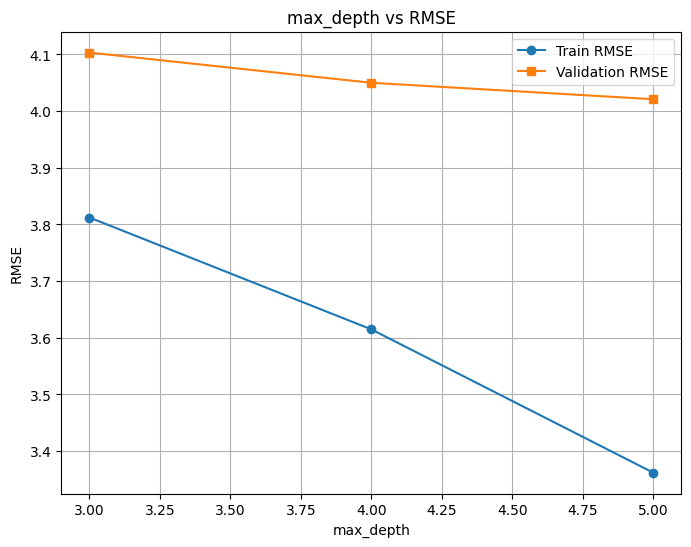

CPU times: total: 40.5 s
Wall time: 3 s


In [149]:
%%time
test_param_and_plot(
    XGBRegressor, 
    'max_depth', 
    [3, 4, 5], 
    train_inputs, 
    train_targets, 
    val_inputs, 
    val_targets, 
    **best_params
)


In [154]:
best_params['max_depth'] = 5


 Testing learning_rate = 0.05
Training model with params: {'random_state': 42, 'n_jobs': -1, 'objective': 'reg:squarederror', 'learning_rate': 0.05}
✅ train_RMSE: 3.7244, val_RMSE: 4.0889

 Testing learning_rate = 0.1
Training model with params: {'random_state': 42, 'n_jobs': -1, 'objective': 'reg:squarederror', 'learning_rate': 0.1}
✅ train_RMSE: 3.4865, val_RMSE: 4.0129

 Testing learning_rate = 0.25
Training model with params: {'random_state': 42, 'n_jobs': -1, 'objective': 'reg:squarederror', 'learning_rate': 0.25}
✅ train_RMSE: 3.1763, val_RMSE: 3.9808


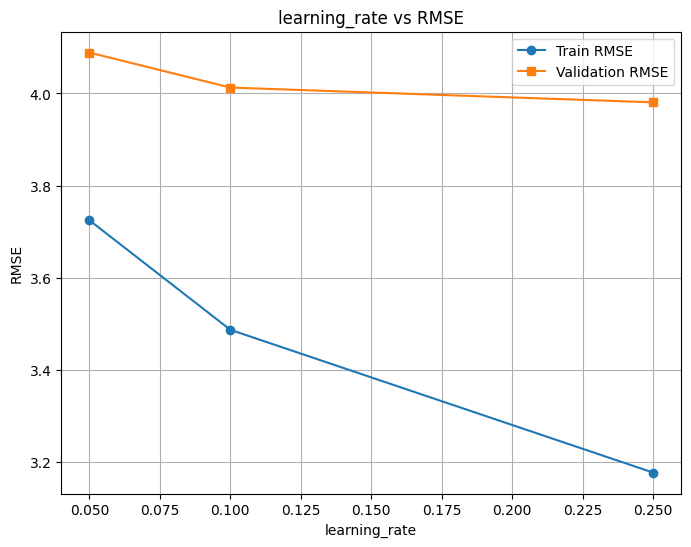

CPU times: total: 58.6 s
Wall time: 4.28 s


In [152]:

%%time
test_param_and_plot(
    XGBRegressor,                     
    'learning_rate',                  
    [0.05, 0.1, 0.25],                
    train_inputs,                     
    train_targets,                   
    val_inputs,                       
    val_targets,                    
    **best_params                    
)

In [153]:
best_params['learning_rate'] = 0.25

In [156]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)

In [157]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: total: 1min 10s
Wall time: 5.21 s


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [158]:
evaluate(xgb_model_final)

(3.1786731348558623,
 3.976877376178593,
 array([ 6.623594,  8.246958,  9.903263, ..., 11.923758,  9.23131 ,
        10.091606], shape=(431098,), dtype=float32),
 array([14.596881,  5.782615, 47.894527, ...,  7.492683, 30.270473,
         8.778213], shape=(107742,), dtype=float32))